In [ ]:
%cd ..
import pandas as pd
import numpy as np
import os

In [2]:
from matplotlib import pyplot as plt

In [3]:
plt.style.use('dark_background')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from src.evaluator import Evaluator

In [6]:
def load_everything(evaluator):
    if mask_logs:=evaluator.load_logs() is False:
        return None
    
    return evaluator

In [7]:
import glob

## Forward Evaluators

In [8]:
paths = 'experiments_reactions/task=forward/notation=*/*/*/'
folders= [d for d in glob.glob(paths) if os.path.isdir(d)]
evaluators_forward = [Evaluator.from_path(folder) for folder in folders]

df = pd.concat( [evaluator.as_dataframe_cell() for evaluator in evaluators_forward], ignore_index=True )
df['evaluator'] = df['evaluator'].apply(load_everything)
df.dropna(axis=0, inplace=True)

# retrieving the last value from validation loss curve
df['val_loss'] = df['evaluator'].apply(lambda x: x.logs.val_loss.iloc[-1])

In [9]:
grouped = df.groupby(df.notation)
best_of_forward = pd.concat([ 
    group.sort_values('val_loss').iloc[[0]]
    for key, group in grouped
], ignore_index=True)

best_of_forward['task'] = 'forward'

In [10]:
best_of_forward

,model_dim,num_heads,num_layers,batch_size,lr,dropout,notation,evaluator,val_loss,task
0,512,4,5,256,0.0001,0.3,fragsmiles,<src.evaluator.ForwardEvaluator object at 0x7f...,0.243751,forward
1,512,4,5,256,0.0001,0.3,safe,<src.evaluator.ForwardEvaluator object at 0x7f...,0.216205,forward
2,256,4,3,512,0.0010,0.3,selfies,<src.evaluator.ForwardEvaluator object at 0x7f...,0.262889,forward
3,256,4,4,512,0.0010,0.3,smiles,<src.evaluator.ForwardEvaluator object at 0x7f...,0.115879,forward


## Backward Evaluators

In [11]:
paths = 'experiments_reactions/task=backward/notation=*/*/*/'
folders= [d for d in glob.glob(paths) if os.path.isdir(d)]
evaluators_backward = [Evaluator.from_path(folder) for folder in folders]

df = pd.concat( [evaluator.as_dataframe_cell() for evaluator in evaluators_backward], ignore_index=True )
df['evaluator'] = df['evaluator'].apply(load_everything)
df.dropna(axis=0, inplace=True)

# retrieving the last value from validation loss curve
df['val_loss'] = df['evaluator'].apply(lambda x: x.logs.val_loss.iloc[-1])

In [12]:
grouped = df.groupby(df.notation)
best_of_backward = pd.concat([ 
    group.sort_values('val_loss').iloc[[0]]
    for key, group in grouped
], ignore_index=True)

best_of_backward['task'] = 'backward'

In [13]:
best_of_backward

,model_dim,num_heads,num_layers,batch_size,lr,dropout,notation,evaluator,val_loss,task
0,512,4,5,256,0.0001,0.3,fragsmiles,<src.evaluator.BackwardEvaluator object at 0x7...,0.541880,backward
1,256,4,4,512,0.0010,0.3,safe,<src.evaluator.BackwardEvaluator object at 0x7...,0.355816,backward
2,256,4,3,256,0.0010,0.3,selfies,<src.evaluator.BackwardEvaluator object at 0x7...,0.430977,backward
3,256,4,4,512,0.0010,0.3,smiles,<src.evaluator.BackwardEvaluator object at 0x7...,0.286131,backward


## latex table

In [19]:
best_of_full = pd.concat([best_of_forward, best_of_backward], ignore_index=True)

In [20]:
from src.configs.constants import NOTATIONS_NAME

In [21]:
best_of_full.notation = best_of_full.notation.apply(NOTATIONS_NAME.get)

In [22]:
best_of_full

,model_dim,num_heads,num_layers,batch_size,lr,dropout,notation,evaluator,val_loss,task
0,512,4,5,256,0.0001,0.3,fragSMILES,<src.evaluator.ForwardEvaluator object at 0x7f...,0.243751,forward
1,512,4,5,256,0.0001,0.3,SAFE,<src.evaluator.ForwardEvaluator object at 0x7f...,0.216205,forward
2,256,4,3,512,0.0010,0.3,SELFIES,<src.evaluator.ForwardEvaluator object at 0x7f...,0.262889,forward
3,256,4,4,512,0.0010,0.3,SMILES,<src.evaluator.ForwardEvaluator object at 0x7f...,0.115879,forward
4,512,4,5,256,0.0001,0.3,fragSMILES,<src.evaluator.BackwardEvaluator object at 0x7...,0.541880,backward
5,256,4,4,512,0.0010,0.3,SAFE,<src.evaluator.BackwardEvaluator object at 0x7...,0.355816,backward
6,256,4,3,256,0.0010,0.3,SELFIES,<src.evaluator.BackwardEvaluator object at 0x7...,0.430977,backward
7,256,4,4,512,0.0010,0.3,SMILES,<src.evaluator.BackwardEvaluator object at 0x7...,0.286131,backward


## Logs

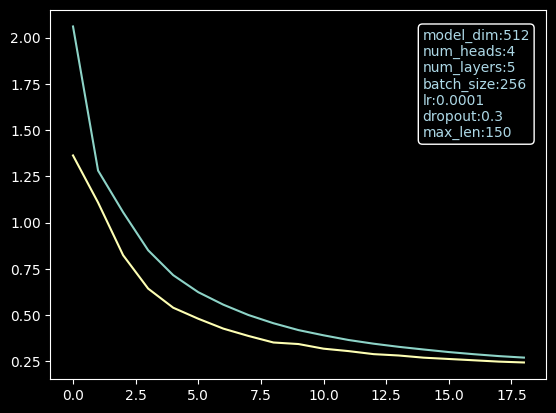

In [18]:
ax = plt.gca()

evaluator = best_of_forward.loc[0,'evaluator']
evaluator.plot_logs(ax)

# Path experiments for bestof setup

In [25]:
# forward
for evaluator in best_of_forward.evaluator:
    print(evaluator.DIR_SETUP)

./experiments_reactions/task=forward/notation=fragsmiles/model_dim=512-num_heads=4-num_layers=5/batch_size=256-lr=0.0001-dropout=0.3
./experiments_reactions/task=forward/notation=safe/model_dim=512-num_heads=4-num_layers=5/batch_size=256-lr=0.0001-dropout=0.3
./experiments_reactions/task=forward/notation=selfies/model_dim=256-num_heads=4-num_layers=3/batch_size=512-lr=0.001-dropout=0.3
./experiments_reactions/task=forward/notation=smiles/model_dim=256-num_heads=4-num_layers=4/batch_size=512-lr=0.001-dropout=0.3


In [ ]:
# backward
for evaluator in best_of_backward.evaluator:
    print(evaluator.DIR_SETUP)

./experiments_reactions/task=backward/notation=fragsmiles/model_dim=512-num_heads=4-num_layers=5/batch_size=256-lr=0.0001-dropout=0.3
./experiments_reactions/task=backward/notation=safe/model_dim=256-num_heads=4-num_layers=4/batch_size=512-lr=0.001-dropout=0.3
./experiments_reactions/task=backward/notation=selfies/model_dim=256-num_heads=4-num_layers=3/batch_size=256-lr=0.001-dropout=0.3
./experiments_reactions/task=backward/notation=smiles/model_dim=256-num_heads=4-num_layers=4/batch_size=512-lr=0.001-dropout=0.3
